### This Notebook Created by Ehsan Khoapanah Aghdam (`engtekh@gmail.com`) for Analysis of Signals and Systems by Dr. Hadi Seyed-Arabi
<p align="center">
    <img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/University_of_tabriz_vector_blue_org.svg/1920px-University_of_tabriz_vector_blue_org.svg.png' alt="drawing" width="200"/>
</p>

# Import Modules

In [6]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['text.usetex'] = True

C:\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


# Produce Important Signals

> ## Step function
> - ### Discrete
> $$ u(n)=   \left\{
> \begin{array}{ll}
>       1 & n \geq 0 \\
>       0 & n < 0 \\
> \end{array} 
> \right.  $$
>
> - ### Continues
> $$ u(t)=   \left\{
> \begin{array}{ll}
>       1 & t > 0 \\
>       0 & t < 0 \\
> \end{array} 
> \right.  $$

In [5]:
def heaviside(x):
    return 1 if x > 0 else 0

In [6]:
heaviside(5)

1

In [7]:
heaviside(0)

0

In [8]:
heaviside(-10)

0

In [9]:
x = np.linspace(-5, 5, 11); x

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [10]:
heaviside(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [11]:
heaviside = np.vectorize(heaviside)

In [12]:
heaviside(x)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [13]:
heaviside(-14)

array(0)

In [14]:
def heaviside(x):
    return 1.0 * (x > 0)
heaviside(x)

array([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

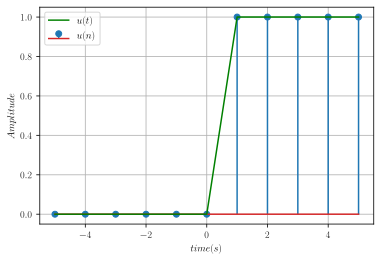

In [15]:
fig, ax = plt.subplots()
ax.stem(x, heaviside(x), label = '$u(n)$')
ax.set_xlabel('$time (s)$')
ax.set_ylabel('$Amplitude$')
ax.plot(x, heaviside(x), color = 'g', label = '$u(t)$')
ax.legend()
ax.grid()

In [16]:
x = np.linspace(-5, 5, 100)

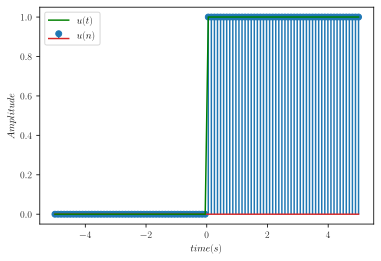

In [17]:
fig, ax = plt.subplots()
ax.stem(x, heaviside(x), label = '$u(n)$')
ax.set_xlabel('$time (s)$')
ax.set_ylabel('$Amplitude$')
ax.plot(x, heaviside(x), color = 'g', label = '$u(t)$')
ax.legend()

> ## Also there is function in numpy as `numpy.heavisde` to produce step function

In [18]:
np.heaviside?

Call signature:  np.heaviside(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'heaviside'>
File:            c:\miniconda3\lib\site-packages\numpy\__init__.py
Docstring:      
heaviside(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Compute the Heaviside step function.

The Heaviside step function is defined as::

                          0   if x1 < 0
    heaviside(x1, x2) =  x2   if x1 == 0
                          1   if x1 > 0

where `x2` is often taken to be 0.5, but 0 and 1 are also sometimes used.

Parameters
----------
x1 : array_like
    Input values.
x2 : array_like
    The value of the function when x1 is 0.
    If ``x1.shape != x2.shape``, they must be broadcastable to a common
    shape (which becomes the shape of the output).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broa

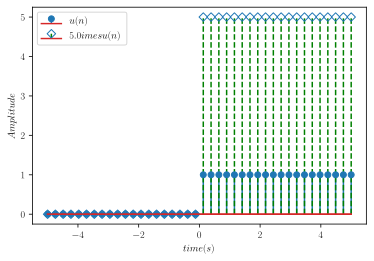

In [7]:
y = np.linspace(-5, 5, 40)
fig, ax = plt.subplots()
ax.stem(y, np.heaviside(y, 1), label = '$u(n)$')
ax.set_xlabel('$time (s)$')
ax.set_ylabel('$Amplitude$')
markerline, stemlines, baseline = ax.stem(y, 5.0 * np.heaviside(y, 1), linefmt='g--', 
                                          markerfmt='D', label = '$5.0 \times u(n)$')
markerline.set_markerfacecolor('none')
ax.legend()

> ## Ramp function
> - ### Discrete
> $$ u(n)=  n u(n) =  \left\{
> \begin{array}{ll}
>       n & n \geq 0 \\
>       0 & n < 0 \\
> \end{array} 
> \right.  $$
>
> - ### Continues
> $$ u(t)= tu(t) =  \left\{
> \begin{array}{ll}
>       t & t \geq 0 \\
>       0 & t < 0 \\
> \end{array} 
> \right.  $$

In [20]:
def ramp(n):
    return np.abs(n) * (n >= 0)

n = np.linspace(-5, 5, 11)
ramp(n)

array([0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5.])

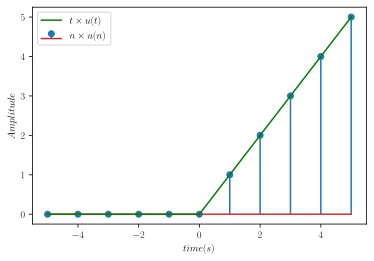

In [21]:
fig, ax = plt.subplots()
ax.stem(n, ramp(n), label = '$n \\times u(n)$')
ax.set_xlabel('$time (s)$')
ax.set_ylabel('$Amplitude$')
ax.plot(n, ramp(n), color = 'g', label = '$t \\times u(t)$')
ax.legend()

> ## Sinusoid Signal
> ### Trigonometric signals could produce easily with `np.sin` , `np.cos` and so on similar functions

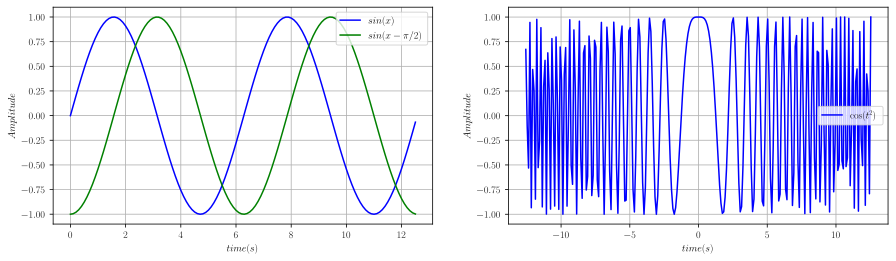

In [34]:
t = np.arange(0,4*np.pi,0.1)

fig, ax = plt.subplots(1, 2, figsize= [15, 4])
ax[0].plot(t, np.sin(t), color = 'blue', label = '$sin(x)$')
ax[0].set_xlabel('$time (s)$')
ax[0].set_ylabel('$Amplitude$')
ax[0].plot(t, np.sin(t - np.pi/2), color = 'green', label = '$sin(x - \pi /2)$')
ax[0].legend()
ax[0].grid()

t_hat = np.arange(-4*np.pi,4*np.pi,0.1)
ax[1].plot(t_hat, np.cos(t_hat**2), color = 'b', label = '$\cos(t^2)$')
#ax[1].plot(t_hat, np.sin(t_hat**2), color = 'g', label = '$\sin(t^2)$')
ax[1].set_xlabel('$time (s)$')
ax[1].set_ylabel('$Amplitude$')
ax[1].legend()
ax[1].grid()

# Even and odd synthesis
### A real-valued sequence $x_{e}(n)$ is called even (symmetric) if:
### $$x_{e}(-n) = x_{e}(n)$$
### A real-valued sequence $x_{o}(n)$ is called odd (antisymmetric) if:
### $$x_{o}(-n) = -x_{o}(n)$$
### Any arbitrary real-valued sequence $x(n)$ can be decomposed into its even and odd components:
### $$x(n) = x_{e}(n) + x_{o}(n)$$

In [72]:
def evenodd(signalVal, timeVal):
    if (np.any(np.imag(signalVal) != 0)):
            print('Error: given signal is not a real sequence ...')
            return False
    symetrical_timeVal = -np.flip(timeVal)
    symetrical_signalVal = np.flip(signalVal)
    timespan = np.unique(np.concatenate((symetrical_timeVal, timeVal), axis = 0))
    s_even = 0.5 * (signalVal + symetrical_signalVal)
    s_odd = 0.5 * (signalVal - symetrical_signalVal)
    return s_even, s_odd, timespan

In [73]:
def heaviside(x):
    return 1j * (x > 0)

timeVal = np.linspace(-5, 5, 11)
signalVal = heaviside(timeVal); signalVal
s_even, s_odd, timespan = evenodd(signalVal, timeVal)

Error: given signal is not a real sequence ...


TypeError: cannot unpack non-iterable NoneType object

[0.5 0.5 0.5 0.5 0.5 0.  0.5 0.5 0.5 0.5 0.5] 
 [-0.5 -0.5 -0.5 -0.5 -0.5  0.   0.5  0.5  0.5  0.5  0.5] 
 [-5. -4. -3. -2. -1. -0.  1.  2.  3.  4.  5.]


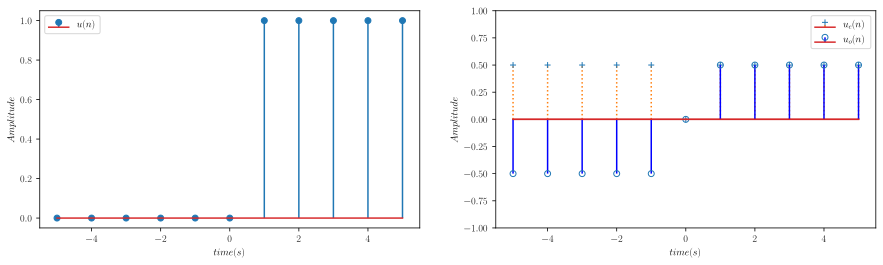

In [87]:
def heaviside(x):
    return 1.0 * (x > 0)

timeVal = np.linspace(-5, 5, 11)
signalVal = heaviside(timeVal)
s_even, s_odd, timespan = evenodd(signalVal, timeVal)
print(s_even, '\n', s_odd, '\n', timespan)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].stem(timeVal, signalVal, label = '$u(n)$')
ax[0].set_xlabel('$time (s)$')
ax[0].set_ylabel('$Amplitude$')
ax[0].legend()

ax[1].stem(timespan, s_even, label = '$u_{e}(n)$', linefmt='C1:',markerfmt = 'C0+')
markerline, stemlines, baseline = ax[1].stem(timespan, s_odd, label = '$u_{o}(n)$', linefmt='blue')
markerline.set_markerfacecolor('none')
ax[1].set_ylim
ax[1].set_xlabel('$time (s)$')
ax[1].set_ylabel('$Amplitude$')
ax[1].set_ylim(-np.max(signalVal), np.max(signalVal))
ax[1].legend()

# Convolution
> - ### Continues
> ### $$y(t) = x(t) * h(t) = \int\limits_{ - \infty }^\infty  {x(\tau )h(t - \tau )d\tau } $$
> - ### Discrete
> ### $$y[n] = x[n] * h[n] = \sum\limits_{k =  - \infty }^\infty  {x[k]h[n - k]} $$

In [3]:
# run showConvolution.py